## PROJECT AKHIR

Pengenalan project akhir terkait Credit Card

In [182]:
import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
df = pd.read_csv('CC General.csv', index_col = "CUST_ID")

In [11]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [12]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [14]:
df.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [24]:
df['BALANCE'].value_counts()

0.000000       80
1100.941072     1
40.074484       1
2093.844656     1
179.765708      1
               ..
1139.691004     1
3494.152843     1
2388.503738     1
2153.498372     1
510.233775      1
Name: BALANCE, Length: 8871, dtype: int64

In [99]:
df.isna ().sum ().sum ()

0

In [95]:
df.dropna(inplace=True)

In [104]:
df.isna ().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<AxesSubplot:xlabel='CREDIT_LIMIT', ylabel='Count'>

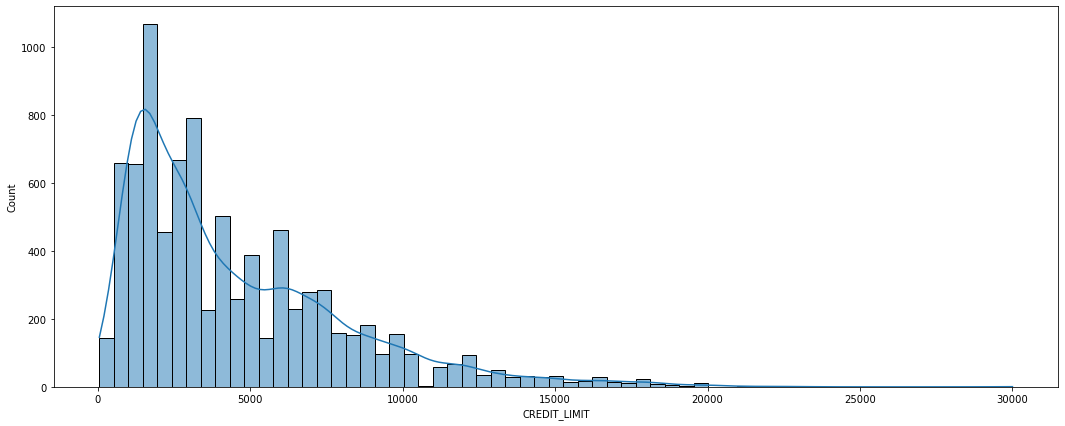

In [105]:
plt.subplots(figsize=(18,7))
sns.histplot(data=df, x="CREDIT_LIMIT", kde=True)

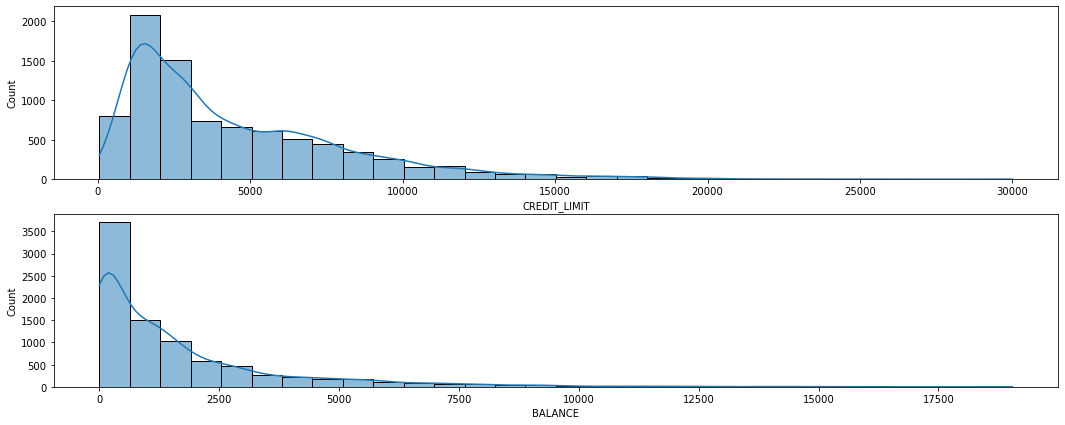

In [106]:
fig, axs = plt.subplots(2,1,figsize=(18,7))

sns.histplot(data=df, bins=30, x="CREDIT_LIMIT", kde=True, ax=axs[0])
sns.histplot(data=df, bins=30, x="BALANCE", kde=True, ax=axs[1])

plt.show()

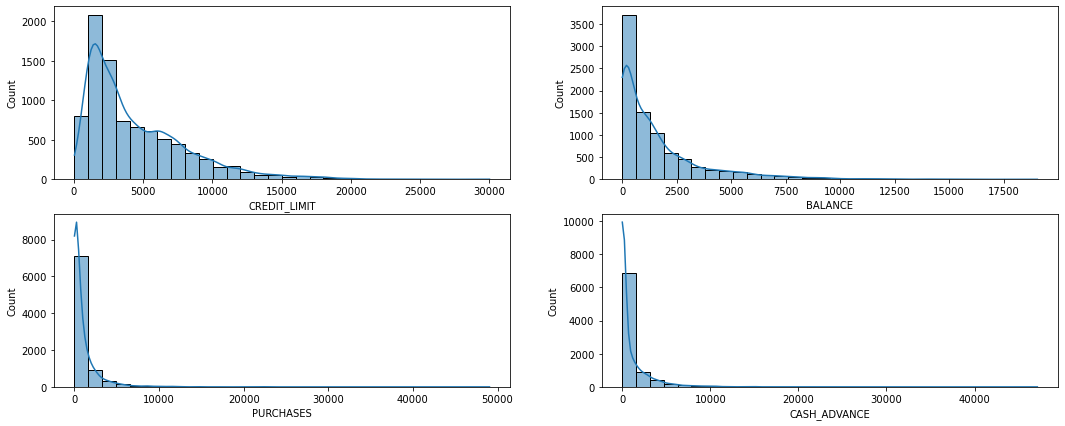

In [107]:
fig, axs = plt.subplots(2,2,figsize=(18,7))

sns.histplot(data=df, bins=30, x="CREDIT_LIMIT", kde=True, ax=axs[0][0])
sns.histplot(data=df, bins=30, x="BALANCE", kde=True, ax=axs[0][1])
sns.histplot(data=df, bins=30, x="PURCHASES", kde=True, ax=axs[1][0])
sns.histplot(data=df, bins=30, x="CASH_ADVANCE", kde=True, ax=axs[1][1])

plt.show()

In [108]:
!pip install pandas_profiling

In [109]:
import pandas_profiling
import pickle

In [110]:
DF.HEAD()

NameError: name 'DF' is not defined

In [111]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [112]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [113]:
X = df[["CREDIT_LIMIT", "BALANCE","PURCHASES", "CASH_ADVANCE"]]
y = df["TENURE"]

In [171]:
data = df
scaler = StandardScaler()
scaler.fit(data)
X = scaler.transform(data)

In [172]:
pca = PCA(n_components = 2, svd_solver='full')
X = pca.fit_transform(X)

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [174]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=360, n_init=6, random_state=72)

In [175]:
kmeans.fit(X_train)

KMeans(max_iter=360, n_clusters=5, n_init=6, random_state=72)

In [176]:
X_train

array([[-0.40790829, -2.28286859],
       [-1.86688067, -0.02693041],
       [-1.00062696, -0.74407248],
       ...,
       [ 0.79293735,  1.82404989],
       [ 0.23949015, -1.8664715 ],
       [-1.79655773,  3.47473059]])

In [177]:
X_train[:,0]

array([-0.40790829, -1.86688067, -1.00062696, ...,  0.79293735,
        0.23949015, -1.79655773])

In [178]:
prediction = kmeans.predict(X_train)
prediction

array([3, 1, 1, ..., 2, 3, 2])

In [179]:
prediction = prediction.reshape(-1,1)
prediction

array([[3],
       [1],
       [1],
       ...,
       [2],
       [3],
       [2]])

In [181]:
X2 = np.hstack([X_train, prediction])
X2

array([[-0.40790829, -2.28286859,  3.        ],
       [-1.86688067, -0.02693041,  1.        ],
       [-1.00062696, -0.74407248,  1.        ],
       ...,
       [ 0.79293735,  1.82404989,  2.        ],
       [ 0.23949015, -1.8664715 ,  3.        ],
       [-1.79655773,  3.47473059,  2.        ]])

In [164]:
X2[X2[:,2]==1] #kategori 1

array([[-1.86688067, -0.02693041,  1.        ],
       [-1.00062696, -0.74407248,  1.        ],
       [-1.54595058, -0.80206642,  1.        ],
       ...,
       [-1.94871947,  0.98255301,  1.        ],
       [-1.95917463,  1.6822908 ,  1.        ],
       [-0.34973523, -0.04341613,  1.        ]])

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

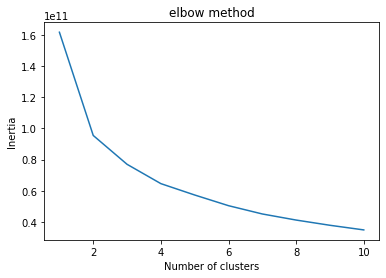

In [133]:
wcss = []

for i in range (1,11):
    kmeans = kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=360, n_init=10, random_state=72)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title("elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [121]:
kmeans = KMeans(n_clusters=6, init="k-means++", max_iter=360, n_init=10,random_state=72)
kmeans.fit(X_train)

KMeans(max_iter=360, n_clusters=6, random_state=72)

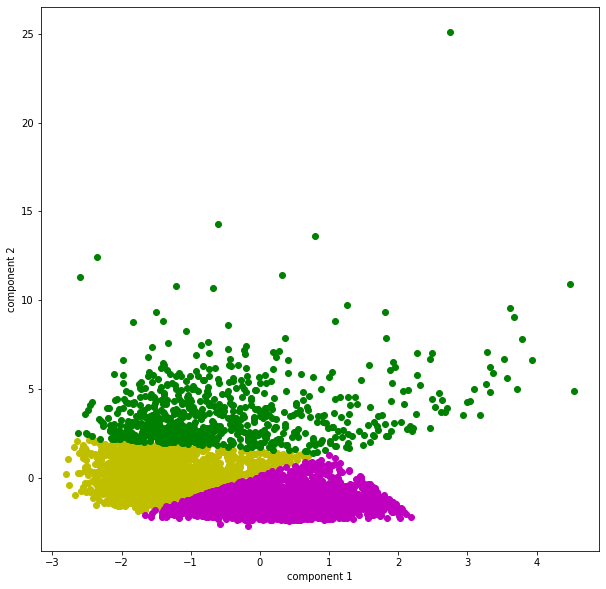

In [170]:
plt.figure(figsize=(10,10))
plt.xlabel("component 1")
plt.ylabel("component 2")

cat_1 = X2[X2[:,2]==1]
plt.scatter(cat_1[:,0], cat_1[:,1], c="y")
cat_2 = X2[X2[:,2]==2]
plt.scatter(cat_2[:,0], cat_2[:,1], c="g")
cat_3 = X2[X2[:,2]==3]
plt.scatter(cat_3[:,0], cat_3[:,1], c="m")


plt.show()

In [184]:
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

print('Accuracy score', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score 0.7441142416055577
              precision    recall  f1-score   support

           6       0.15      0.12      0.13        74
           7       0.02      0.02      0.02        50
           8       0.02      0.02      0.02        55
           9       0.04      0.05      0.05        39
          10       0.04      0.04      0.04        69
          11       0.06      0.06      0.06       112
          12       0.87      0.87      0.87      2192

    accuracy                           0.74      2591
   macro avg       0.17      0.17      0.17      2591
weighted avg       0.75      0.74      0.75      2591



In [186]:
import pickle
pickle.dump(kmeans, open('model.pkl','wb'))

In [187]:
kmeans.predict([X_test[0]])

array([2])

In [188]:
X_test[0]

array([-1.91592531,  2.94807208])

In [189]:
!pip install flask